# Housing Prices Competition for Kaggle Learn Users
## Competition Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## Goal

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

## Metric

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import normaltest, skew, kurtosis, pearsonr, spearmanr
from statsmodels.graphics.gofplots import qqplot

# Exploratory analysis

In [11]:
df = pd.read_csv('data/train.csv')

In [4]:
df.shape

(1460, 81)

There is 1460 observations and 81 features including 'SalePrice'.

In [12]:
pd.set_option('display.max_columns', 81)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [330]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

The next features have missing values or nulls that should be replaced: LotFrontage, MasVnrArea, GarageYrBlt, Alley, MasVnrType, MasVnrArea, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature.

In [51]:
num_features = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
cat_features = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
                'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
                'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
                'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
                'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish',
                'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType',
                'SaleCondition']

In [50]:
len(num_features), len(cat_features)

(35, 44)

The data set has 35 numerical features, 44 categorical features, 'Id' feature and target feature 'SalePrice'. Total number of features: 81.

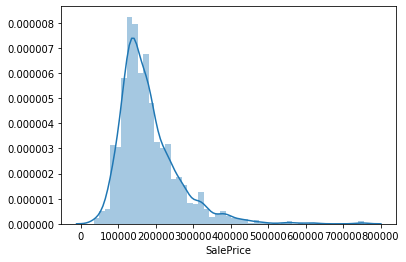

In [65]:
sns.distplot(df['SalePrice'])
plt.show()

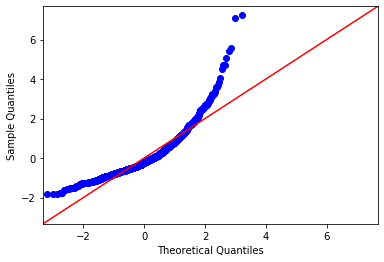

In [74]:
qqplot(df['SalePrice'], fit='True', line='45')
plt.show()

The distribution of 'SalePrice' is far from normal. Thus, the target variable should be transformed (log) before machine learning application.

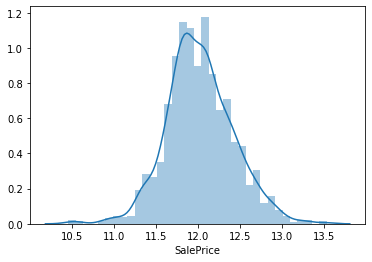

In [75]:
sns.distplot(np.log(df['SalePrice']))
plt.show()

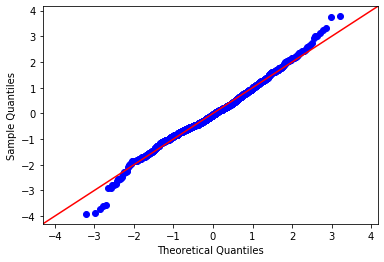

In [76]:
qqplot(np.log(df['SalePrice']), fit='True', line='45')
plt.show()

To-Do:
1. Log 'SalePrice'.

# Numerical features.

In [342]:
def exploratory_analysis(x, y, data):
    fig, axs = plt.subplots(2, 2, figsize=(18, 10))
    
    sns.distplot(data[x].dropna(), ax=axs[0, 0])
    skewness = round(data[x].skew(), 2)
    kurtosis = round(data[x].kurtosis(), 2)
    shapiro_pvalue = round(normaltest(data[x].dropna())[1], 3)
    axs[0, 0].text(x=0.98, y=0.97, transform=axs[0, 0].transAxes, s='Skewness: {}'.format(skewness),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')
    axs[0, 0].text(x=0.98, y=0.9, transform=axs[0, 0].transAxes, s='Kurtosis: {}'.format(kurtosis),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')
    axs[0, 0].text(x=0.98, y=0.83, transform=axs[0, 0].transAxes, s='Normality (p-value): {}'.format(shapiro_pvalue),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')
    
    sns.regplot(data[x].fillna(0), data[y], scatter=True, fit_reg=True, ax=axs[0, 1])
    pearson_pvalue = pearsonr(data[x].fillna(0), data[y])
    pearson_pvalue = round(pearsonr(data[x].fillna(0), data[y])[0], 3)
    spearman_pvalue = round(spearmanr(data[x].fillna(0), data[y])[0], 3)
    axs[0, 1].text(x=0.98, y=0.97, transform=axs[0, 1].transAxes, s='Pearson: {}'.format(pearson_pvalue),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')
    axs[0, 1].text(x=0.98, y=0.9, transform=axs[0, 1].transAxes, s='Spearman: {}'.format(spearman_pvalue),\
        fontsize=10, verticalalignment='top', horizontalalignment='right')
    
    if len(data[x].unique()) < 30:
        boxplt = sns.boxplot(data[x].fillna(0), data[y], ax=axs[1, 0])
        boxplt.set_xticklabels(boxplt.get_xticklabels(), rotation=45)
    else:
        sns.boxplot(data[x].fillna(0), ax=axs[1, 0])
    
    correlations = data.corrwith(data[x]).abs()
    correlations.drop(x, inplace=True)
    correlations.sort_values(ascending=False, inplace=True)
    colors = ['red' if x > 0.8 else 'grey' for x in correlations.values]
    plt.bar(correlations.index, correlations.values, color=colors)
    axs[1, 1].text(x=0.98, y=0.97, transform=axs[1, 1].transAxes, s='Pearson correlations',\
        fontsize=10, verticalalignment='top', horizontalalignment='right')
    plt.xticks(rotation=90)
    plt.show()

## LotFrontage
Linear feet of street connected to property.

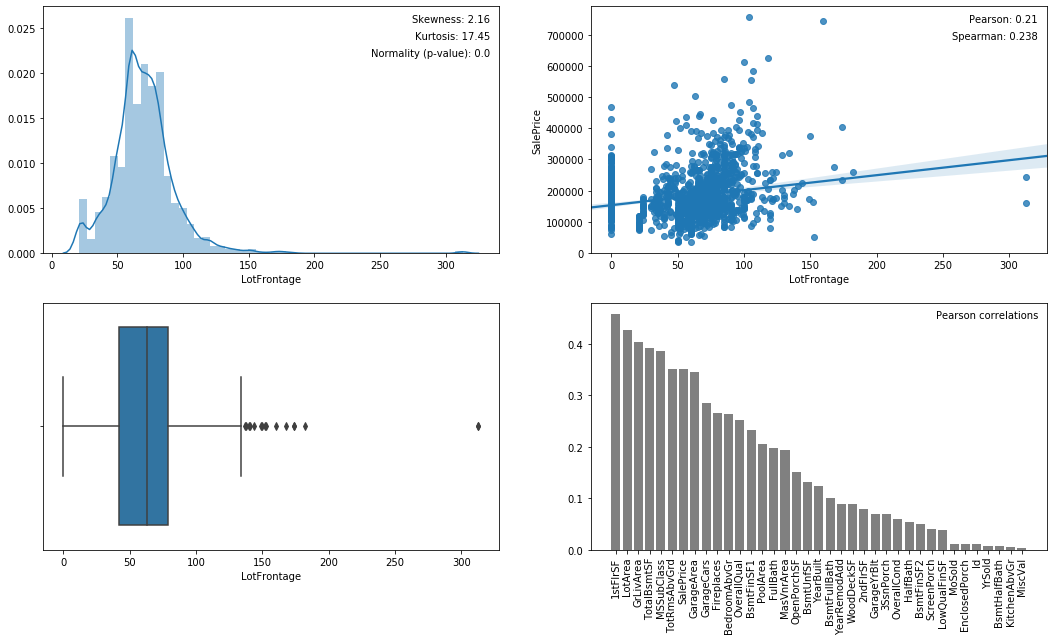

In [345]:
exploratory_analysis('LotFrontage', 'SalePrice', df)

To-Do:
* Fill missing values with 0.
* Log feature.
* Delete outliers: values more than 250.

## LotArea
Lot size in square feet

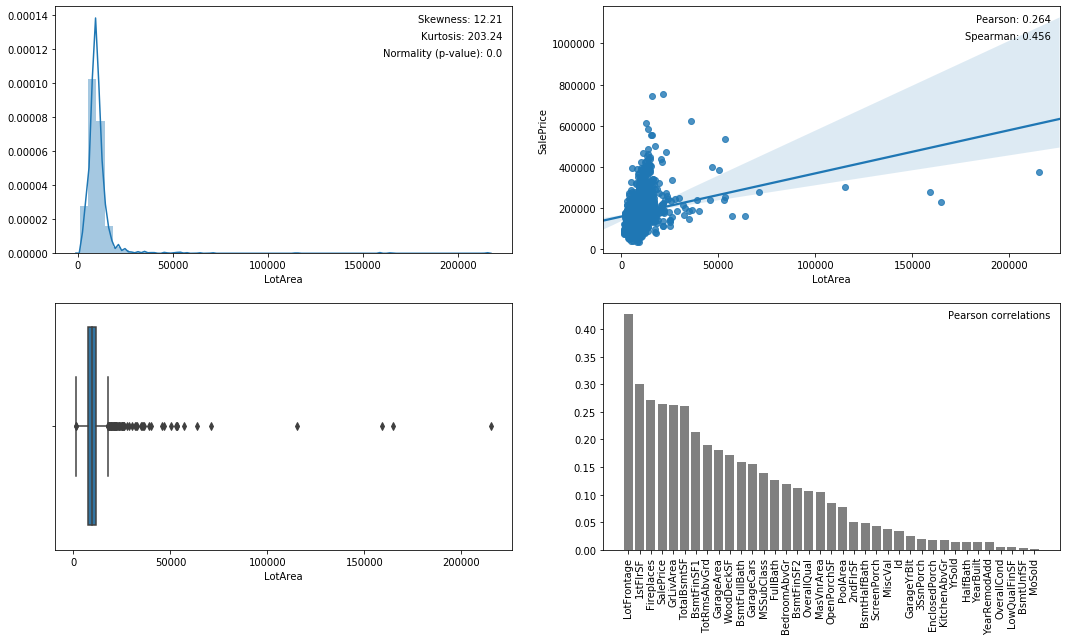

In [358]:
exploratory_analysis('LotArea', 'SalePrice', df)

To-Do:
* Delete outliers: values more than 50000
* Log feature.

## OverallQual
Overall material and finish quality

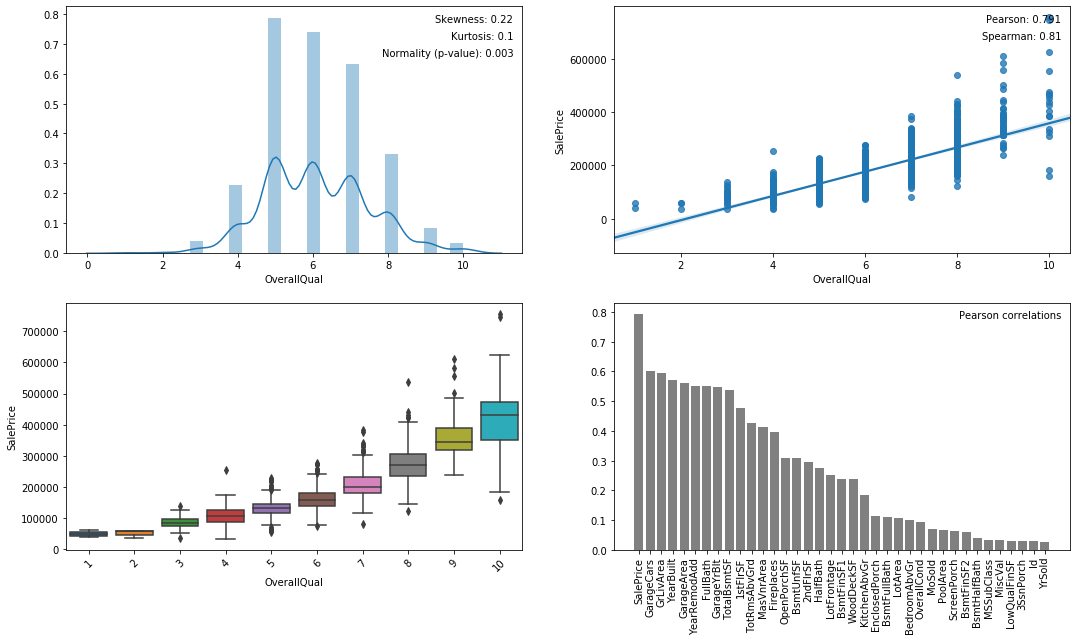

In [359]:
exploratory_analysis('OverallQual', 'SalePrice', df)

The 'OverallQual' feature has very high correlation with target variable. It is not necessary to make additional transformations with the feature.

## OverallCond
Overall condition rating

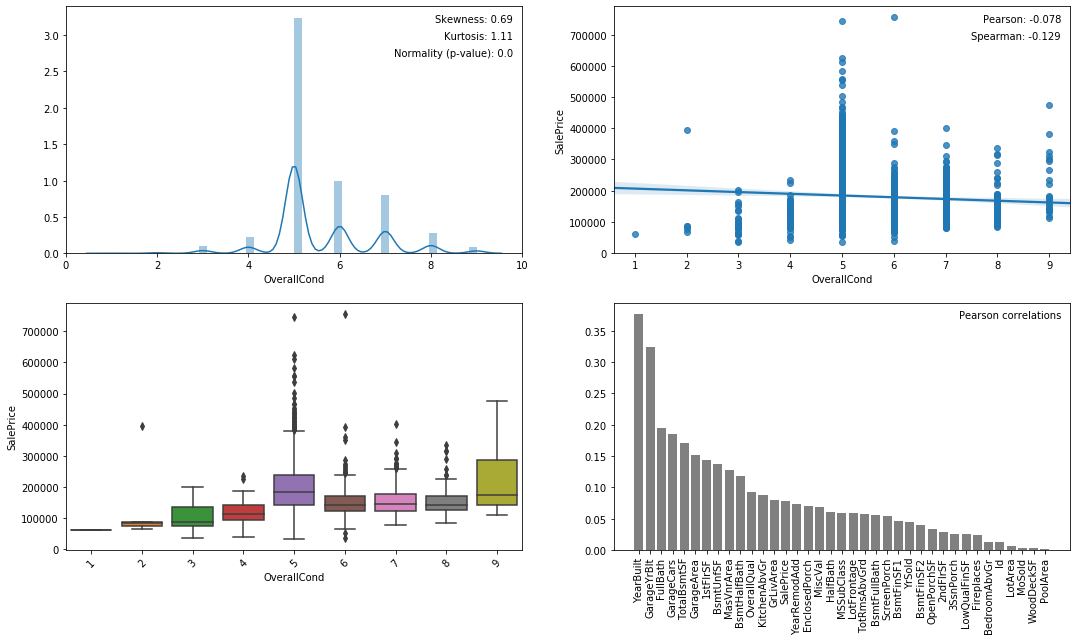

In [360]:
exploratory_analysis('OverallCond', 'SalePrice', df)

Use without any transformations.

## YearBuilt
Original construction date

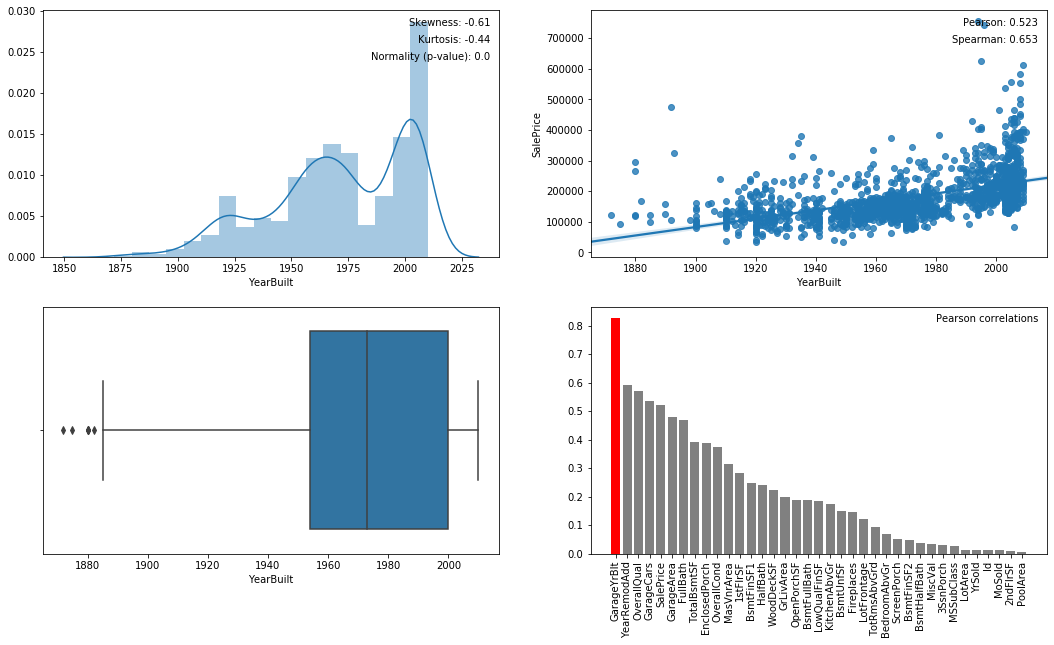

In [363]:
exploratory_analysis('YearBuilt', 'SalePrice', df)

Strong correlation with 'GarageYrBlt' was observed. 'GarageYrBlt' will be dropped.

## GarageYrBlt
Year garage was built

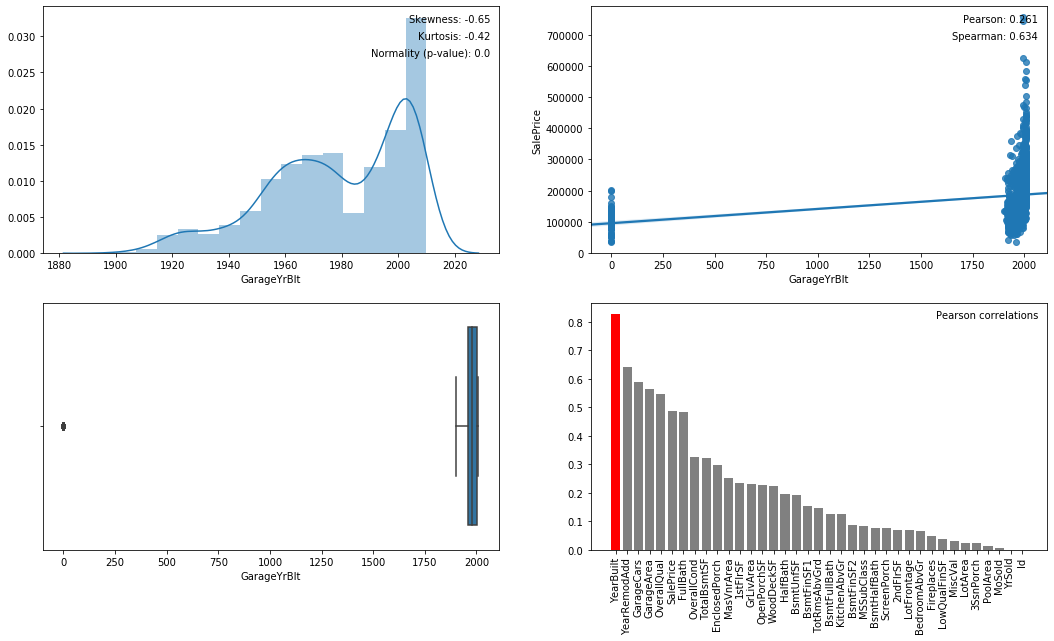

In [430]:
exploratory_analysis('GarageYrBlt', 'SalePrice', df)

Should be deleted due to high correlation with 'YearBuilt'.

## YearRemodAdd
Remodel date

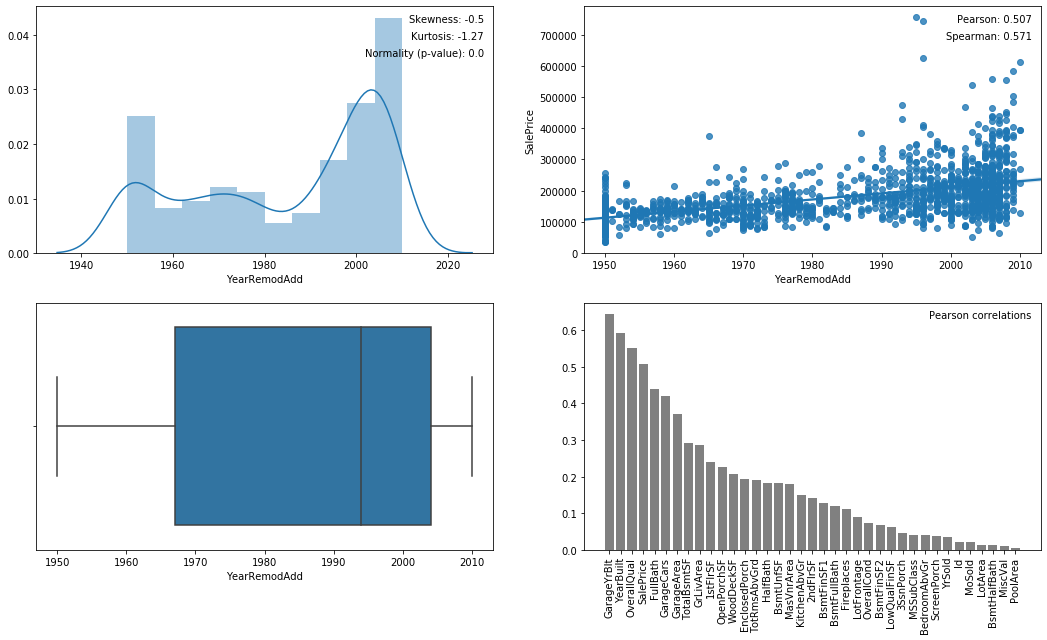

In [391]:
exploratory_analysis('YearRemodAdd', 'SalePrice', df)

Use without any transformations.

## MasVnrArea
Masonry veneer area in square feet

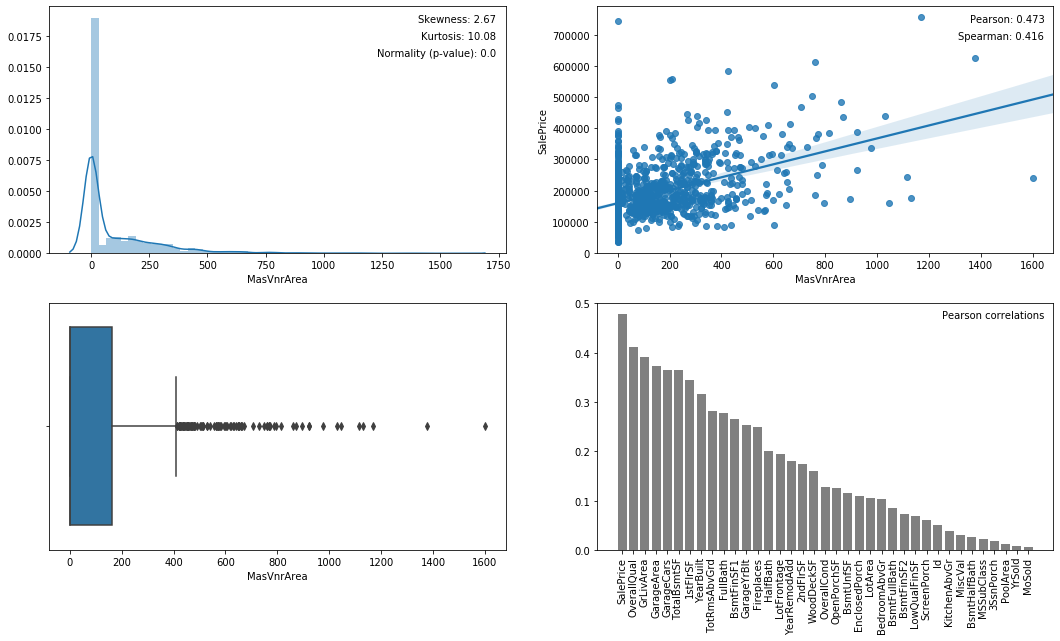

In [392]:
exploratory_analysis('MasVnrArea', 'SalePrice', df)

To-Do:
* Delete outliers: values more than 1200.

## BsmtFinSF1
Type 1 finished square feet

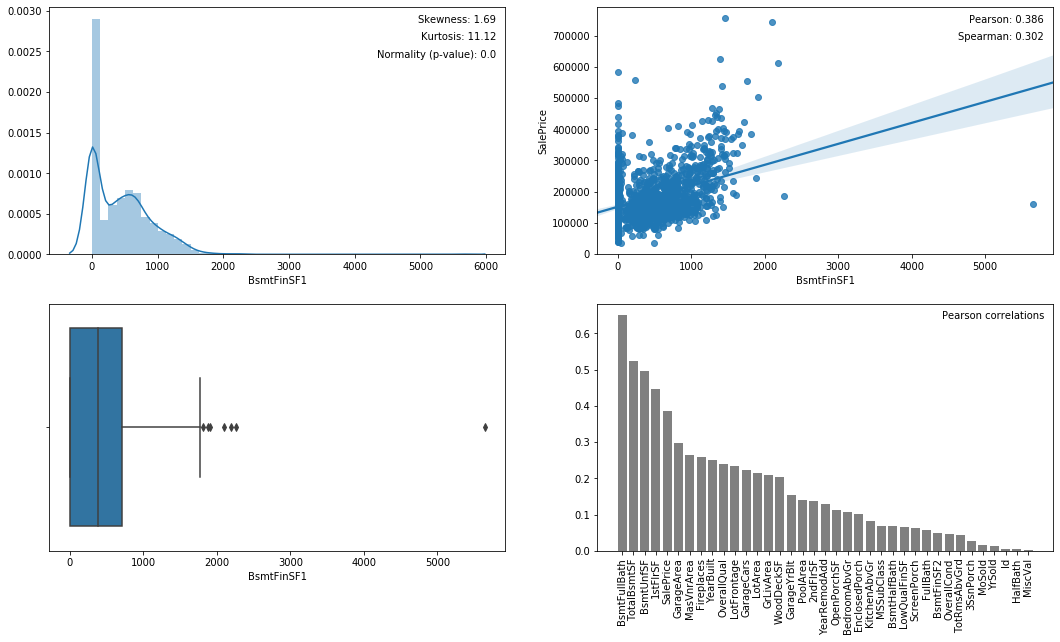

In [399]:
exploratory_analysis('BsmtFinSF1', 'SalePrice', df)

To-Do:
* Delete outlier: values more than 5000.

## BsmtFinSF2
Type 2 finished square feet

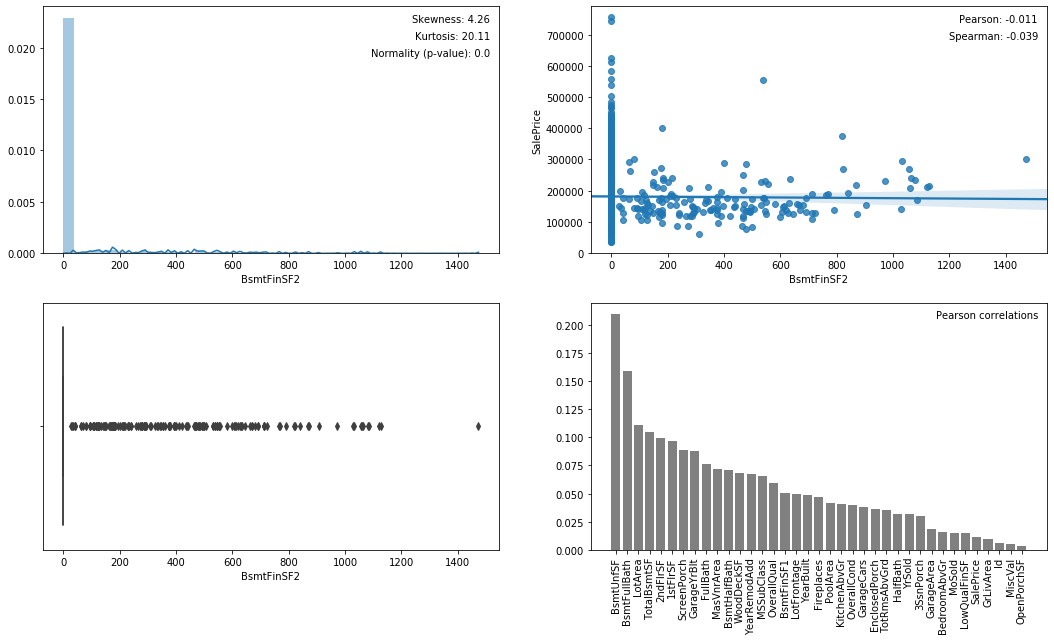

In [402]:
exploratory_analysis('BsmtFinSF2', 'SalePrice', df)

To-Do:
* Delete outlier: values more than 1400.

## BsmtUnfSF
Unfinished square feet of basement area

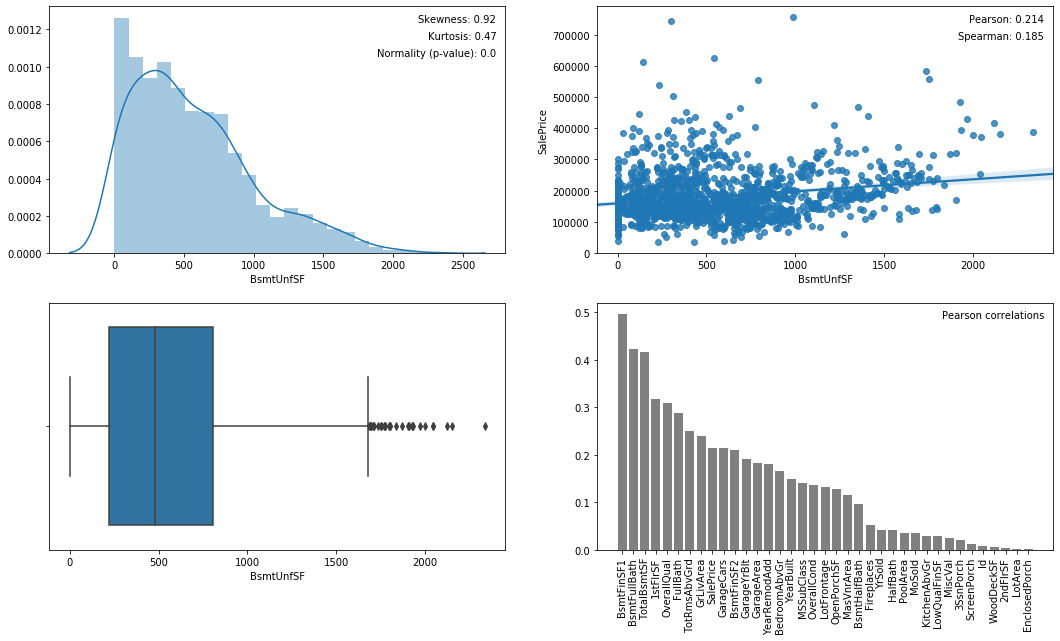

In [404]:
exploratory_analysis('BsmtUnfSF', 'SalePrice', df)

## TotalBsmtSF
Total square feet of basement area

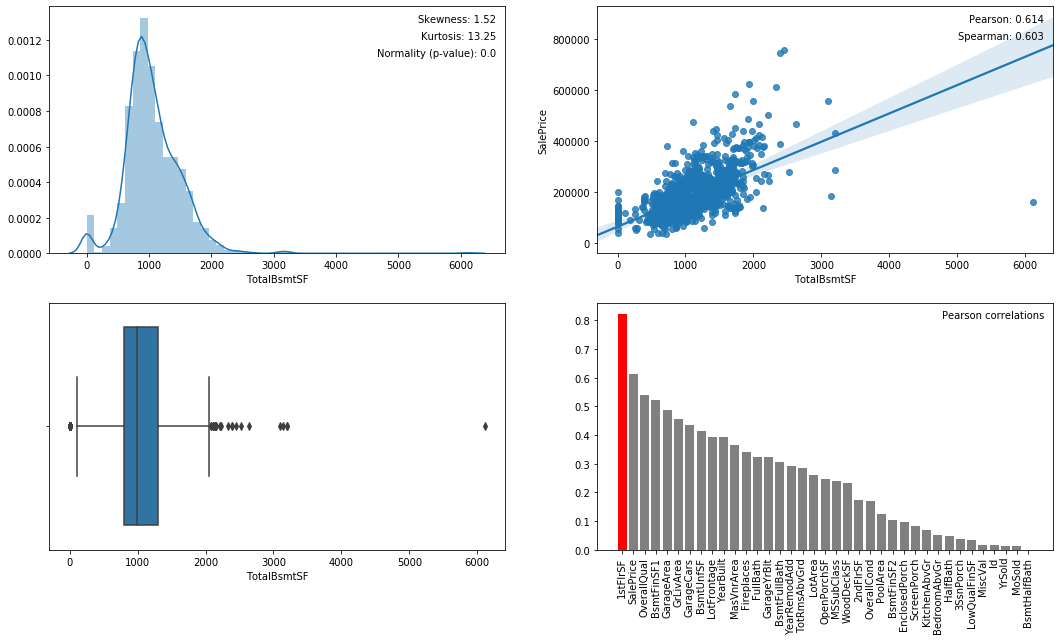

In [405]:
exploratory_analysis('TotalBsmtSF', 'SalePrice', df)

To-Do:
* Delete outlier: value more than 6000.
* Due to high correlation with '1stFlrSF', use proportion of finished basement BsmtFinPer = 1 - BsmtUnfSF/TotalBsmtSF.

## 1stFlrSF
First Floor square feet

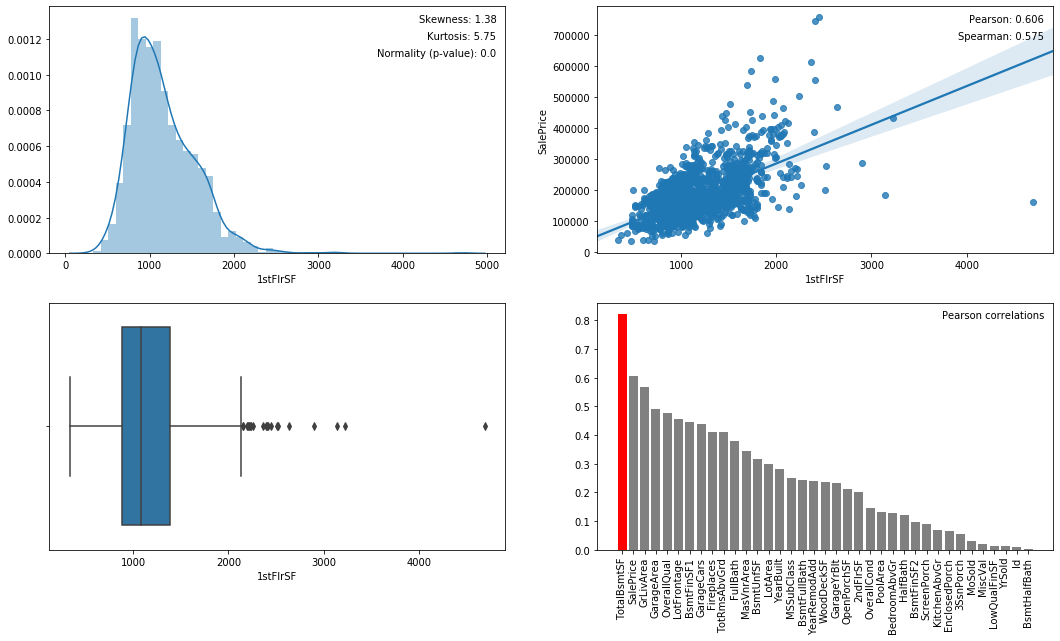

In [407]:
exploratory_analysis('1stFlrSF', 'SalePrice', df)

To-Do:
* Delete outlier: value more than 4000.

## 2ndFlrSF
Second floor square feet

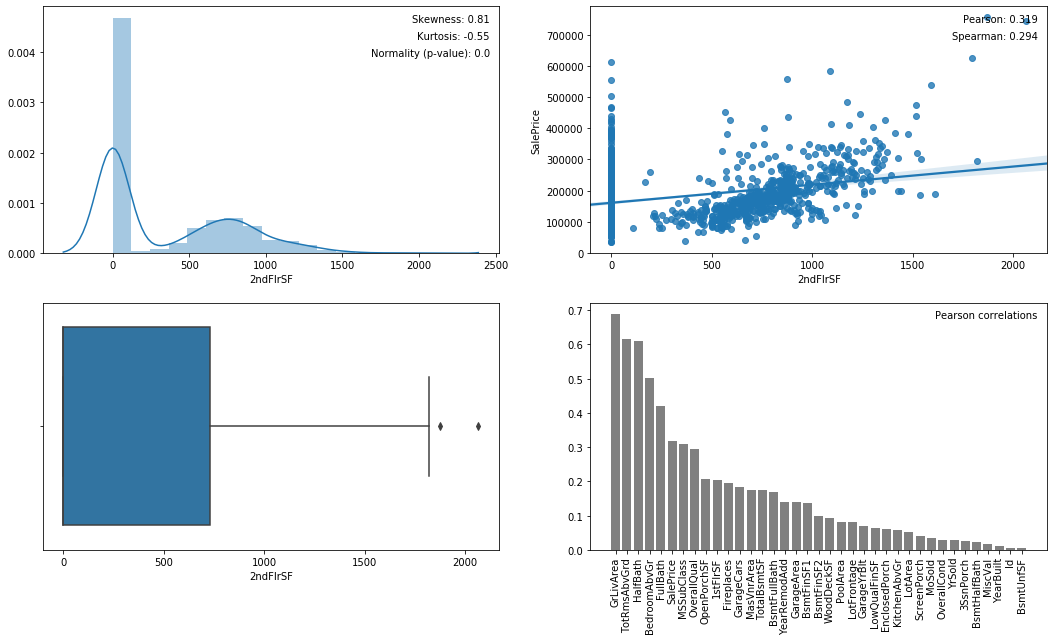

In [408]:
exploratory_analysis('2ndFlrSF', 'SalePrice', df)

To-Do:
* Delete outlier: value more than 2000.

## LowQualFinSF
Low quality finished square feet (all floors)

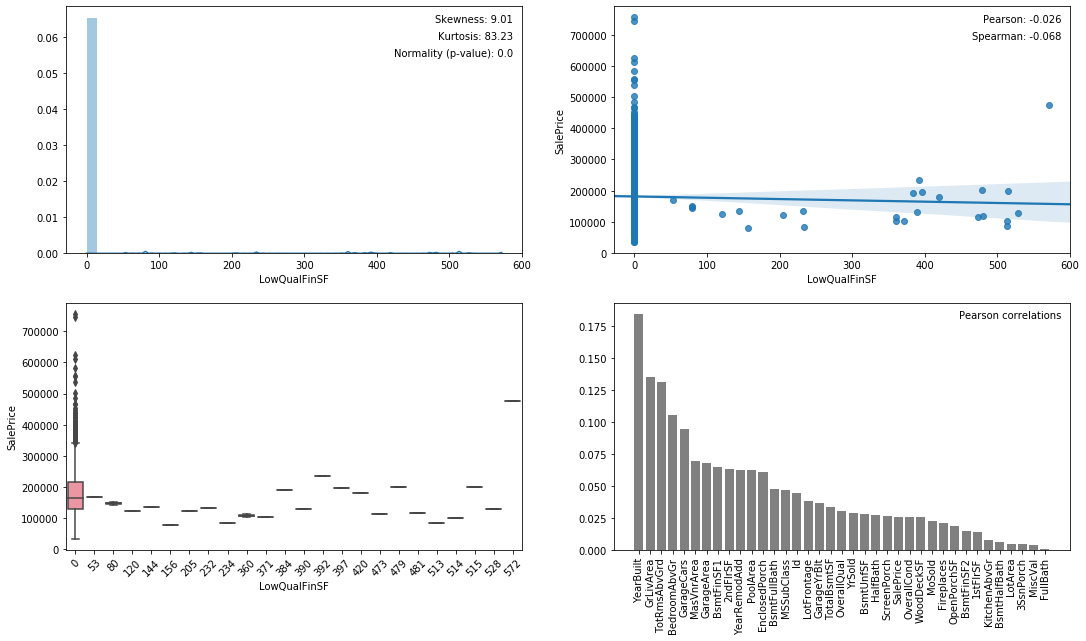

In [409]:
exploratory_analysis('LowQualFinSF', 'SalePrice', df)

In [410]:
(df['LowQualFinSF'] > 0).sum()

26

There is only 26 non-zero values. The feature will be dropped.

## GrLivArea
Above grade (ground) living area square feet

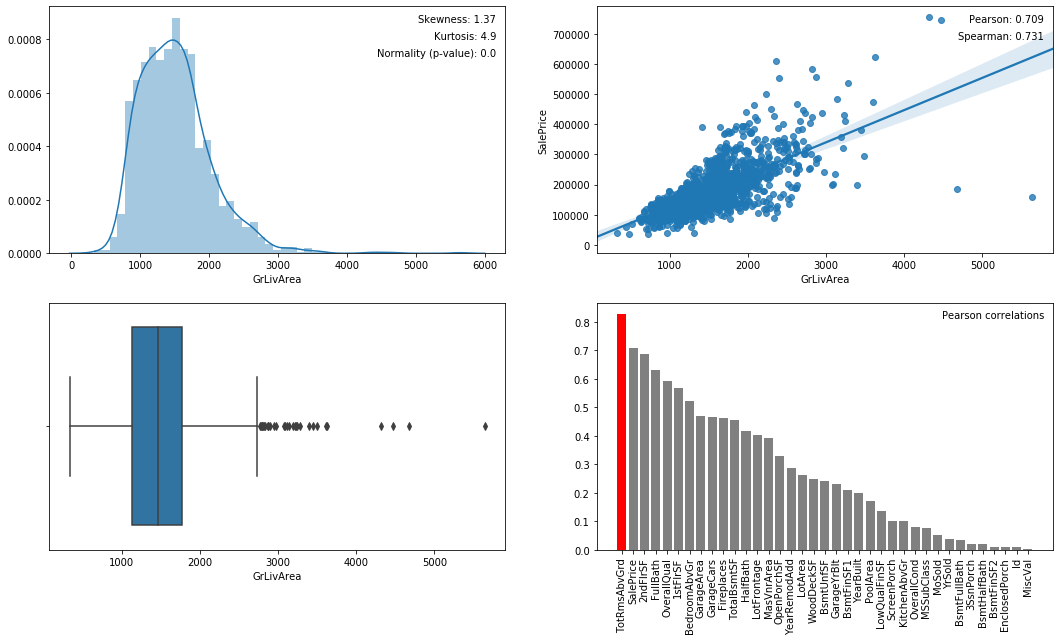

In [411]:
exploratory_analysis('GrLivArea', 'SalePrice', df)

To-Do:
* Delete outliers: values more than 4500
* Log feature.

## TotRmsAbvGrd
Total rooms above grade (does not include bathrooms)

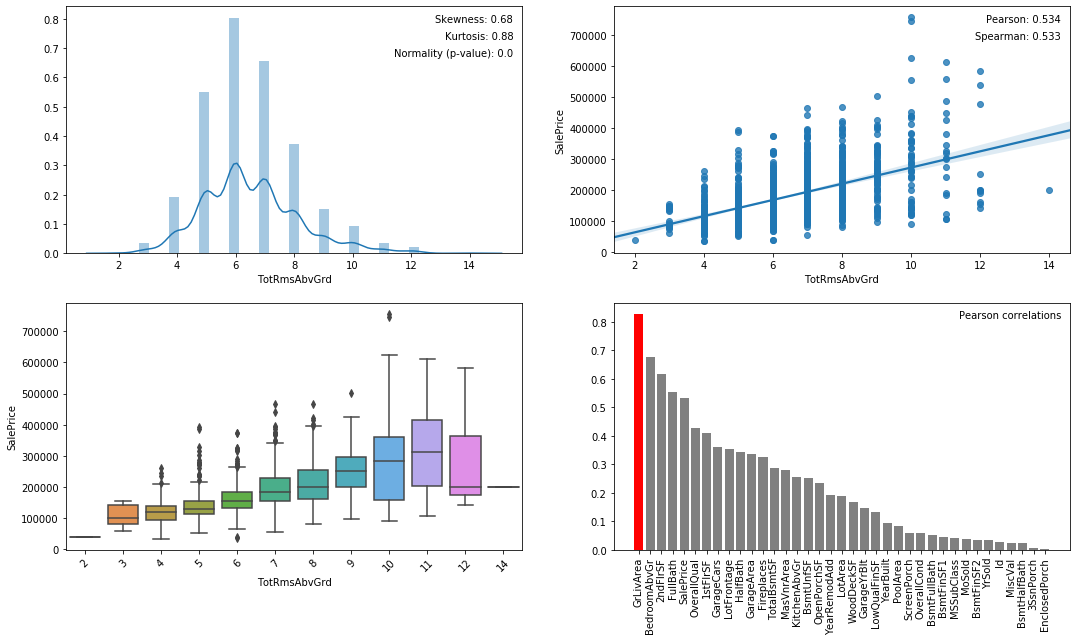

In [422]:
exploratory_analysis('TotRmsAbvGrd', 'SalePrice', df)

The feature should be dropped due to high correlation with 'GrLivArea'.

## BsmtFullBath
Basement full bathrooms

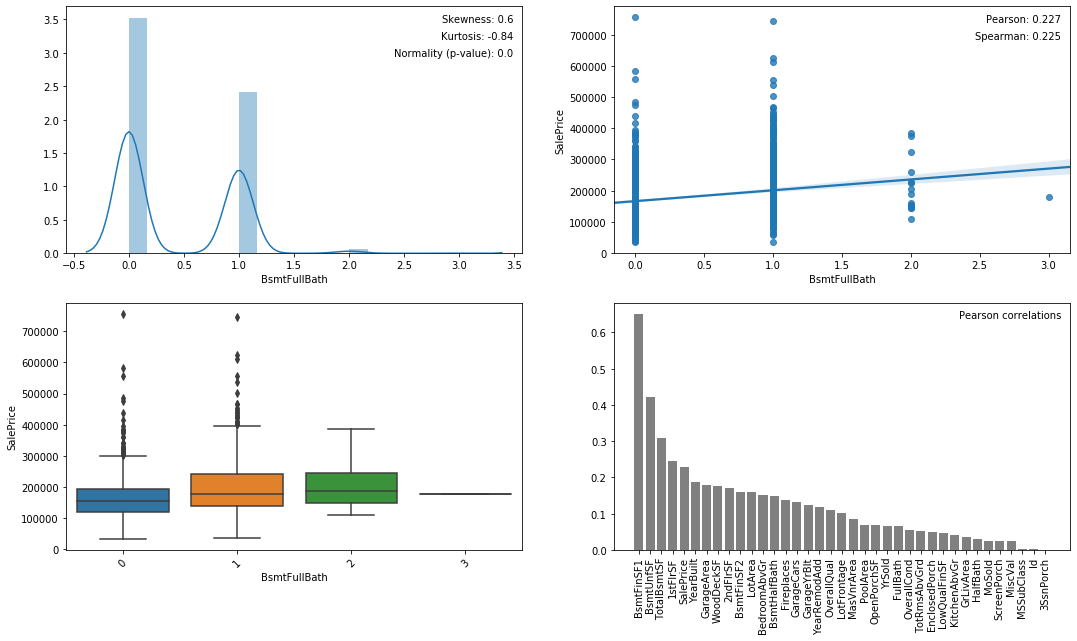

In [423]:
exploratory_analysis('BsmtFullBath', 'SalePrice', df)

Use without any transformations.

## BsmtHalfBath
Basement half bathrooms

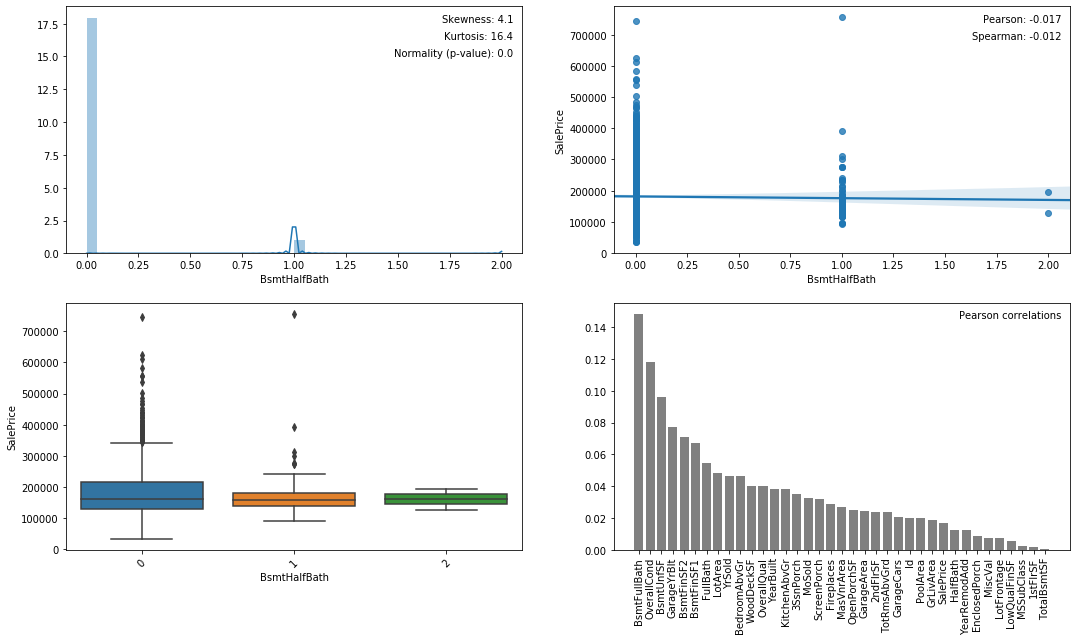

In [424]:
exploratory_analysis('BsmtHalfBath', 'SalePrice', df)

Use without any transformations.

## FullBath
Full bathrooms above grade

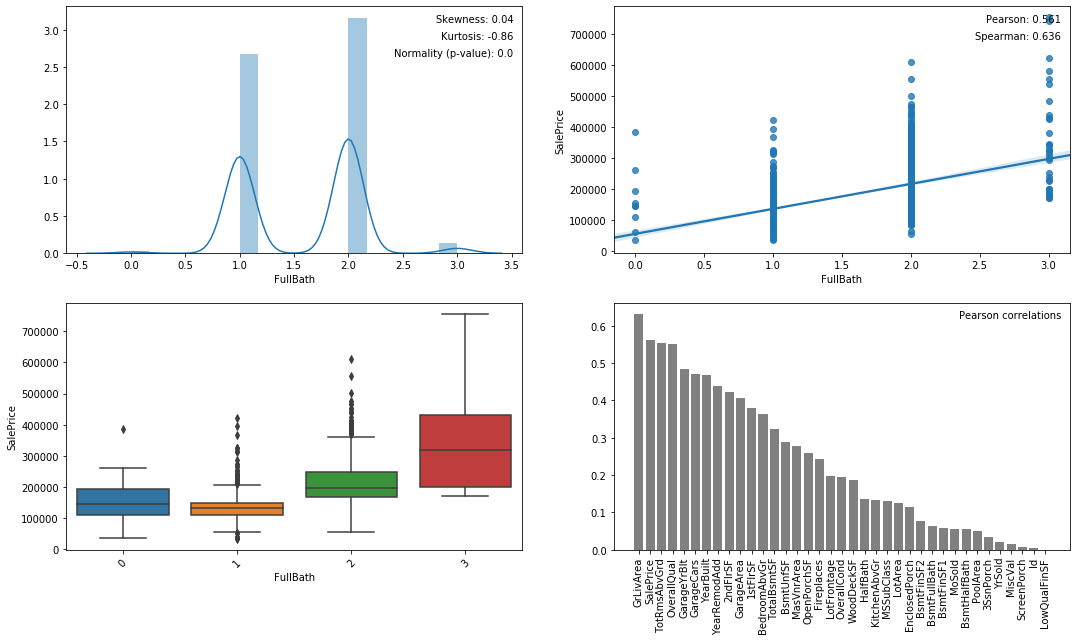

In [425]:
exploratory_analysis('FullBath', 'SalePrice', df)

Use without any transformations.

## HalfBath
Half baths above grade

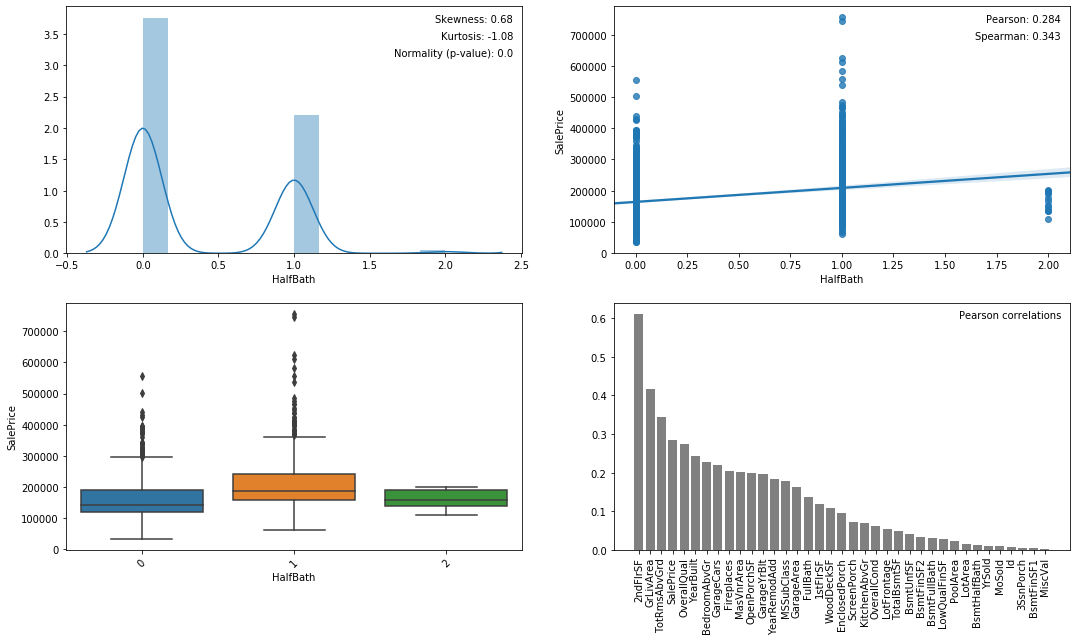

In [426]:
exploratory_analysis('HalfBath', 'SalePrice', df)

Use without any transformations.

## BedroomAbvGr
Number of bedrooms above basement level

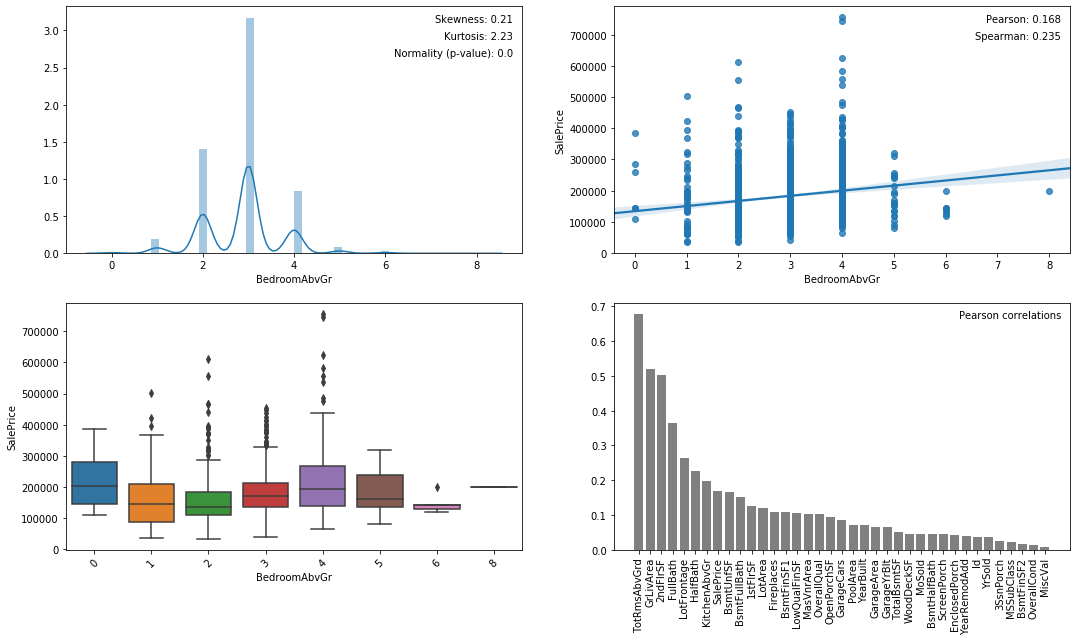

In [427]:
exploratory_analysis('BedroomAbvGr', 'SalePrice', df)

Delete outlier: value more than 6.

## KitchenAbvGr
Number of kitchens

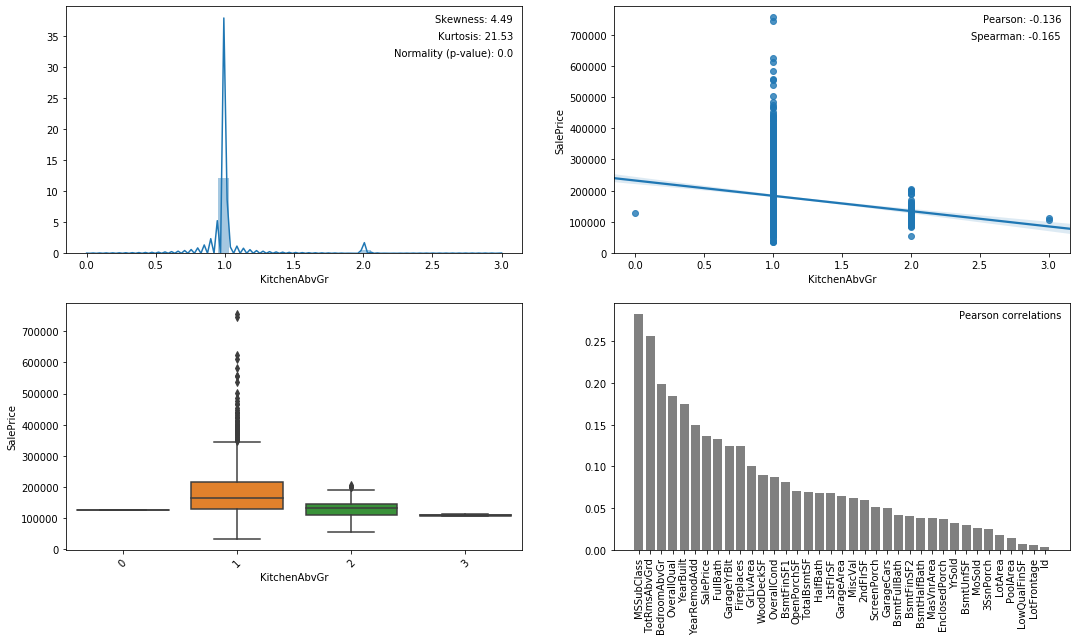

In [428]:
exploratory_analysis('KitchenAbvGr', 'SalePrice', df)

Delete outliers: values less than 1 and more than 2.

## Fireplaces
Number of fireplaces

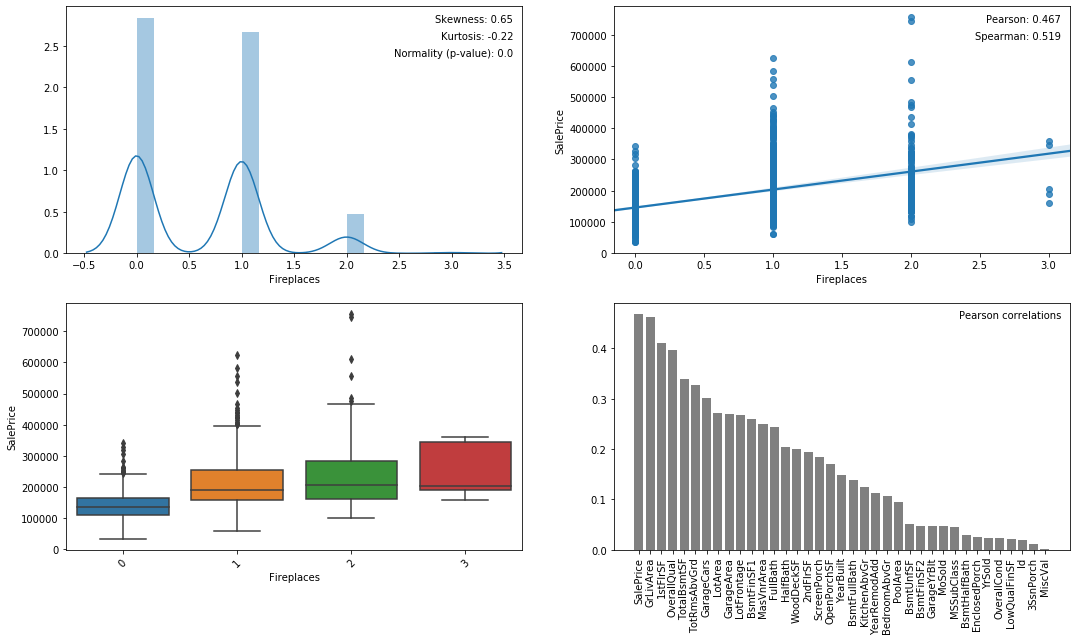

In [429]:
exploratory_analysis('Fireplaces', 'SalePrice', df)

Use without any transformations.

## GarageCars
Size of garage in car capacity

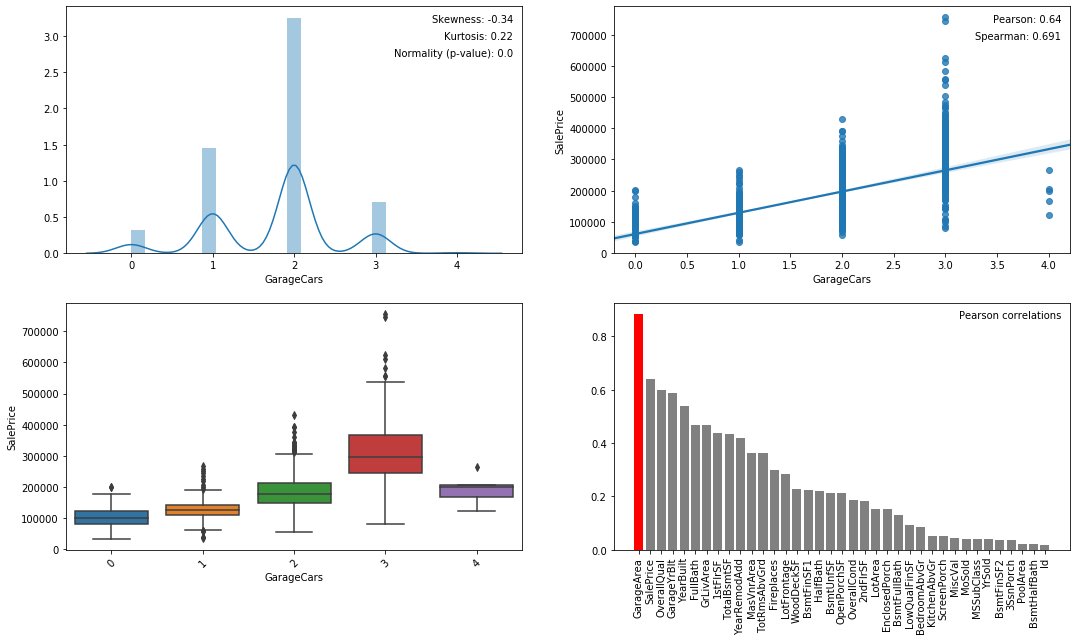

In [431]:
exploratory_analysis('GarageCars', 'SalePrice', df)

## GarageArea
Size of garage in square feet

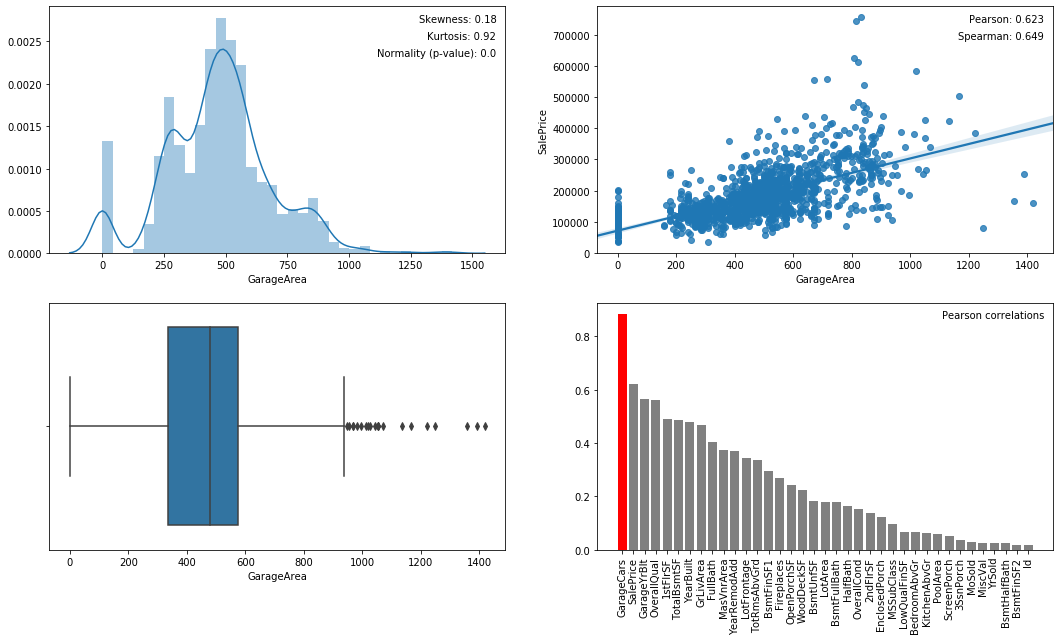

In [432]:
exploratory_analysis('GarageArea', 'SalePrice', df)

GarageArea and GarageCars are highly correlated. GarageArea should be deleted.

## WoodDeckSF
Wood deck area in square feet

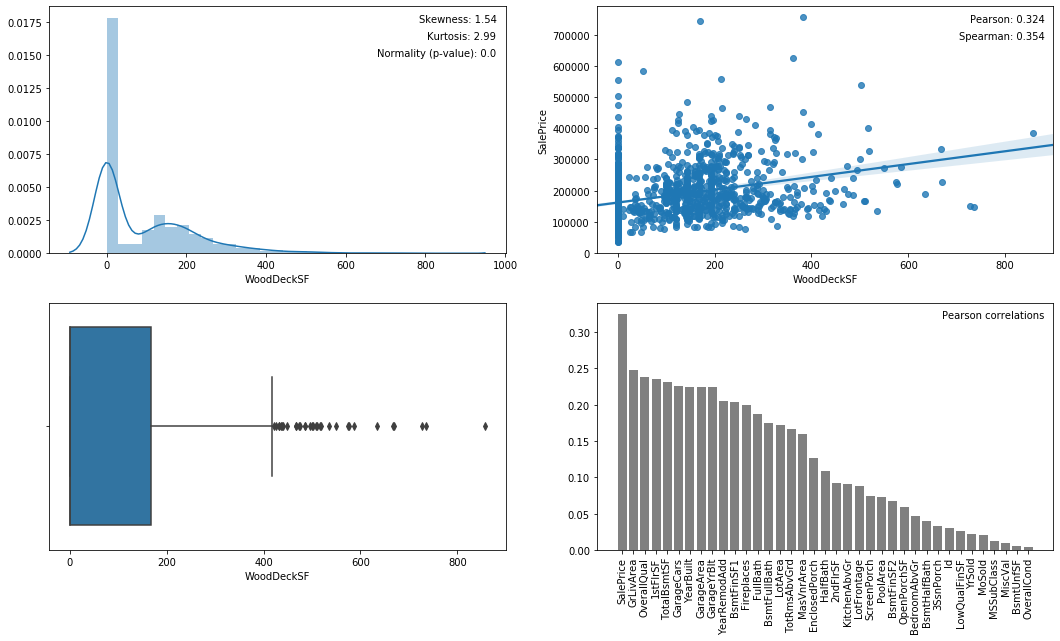

In [433]:
exploratory_analysis('WoodDeckSF', 'SalePrice', df)

Delete outliers: values more than 700.

## OpenPorchSF
Open porch area in square feet

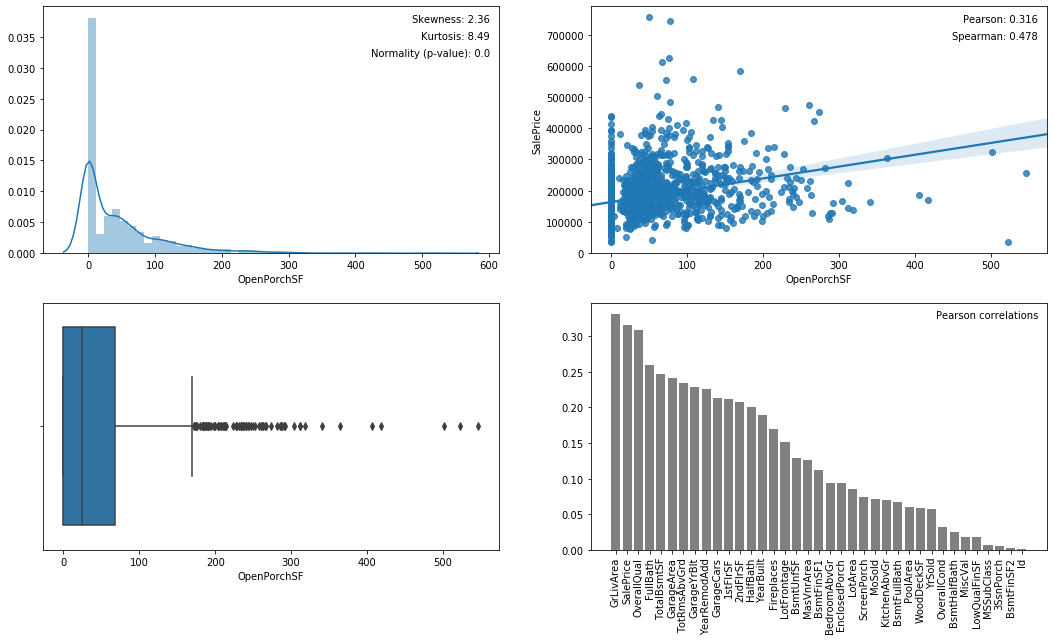

In [434]:
exploratory_analysis('OpenPorchSF', 'SalePrice', df)

Delete outliers: values more than 450.

## EnclosedPorch
Enclosed porch area in square feet

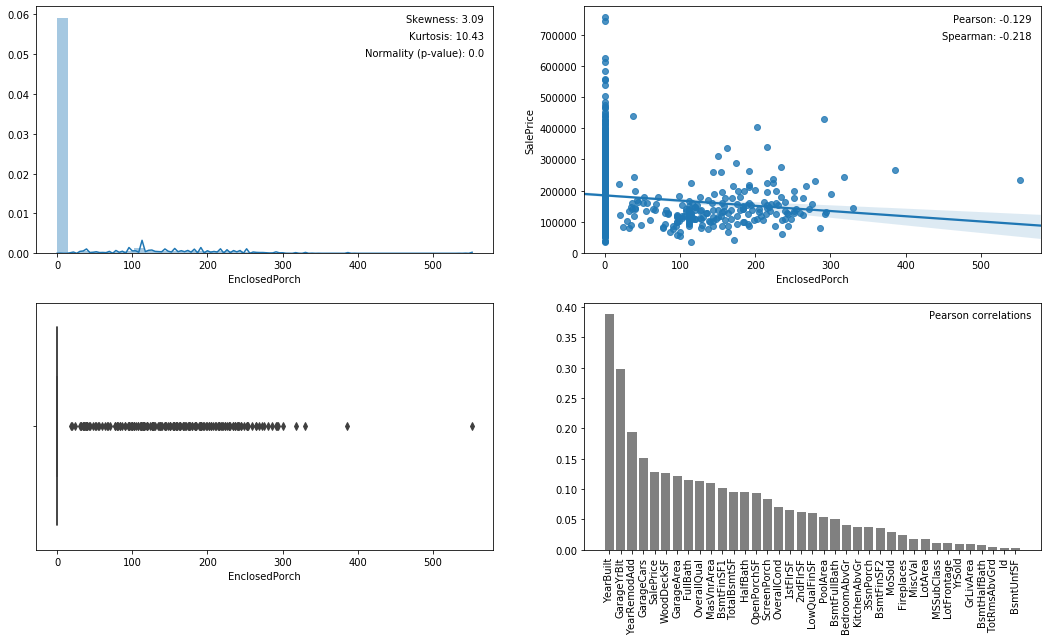

In [435]:
exploratory_analysis('EnclosedPorch', 'SalePrice', df)

Delete outliers: values more than 350.

## 3SsnPorch
Three season porch area in square feet

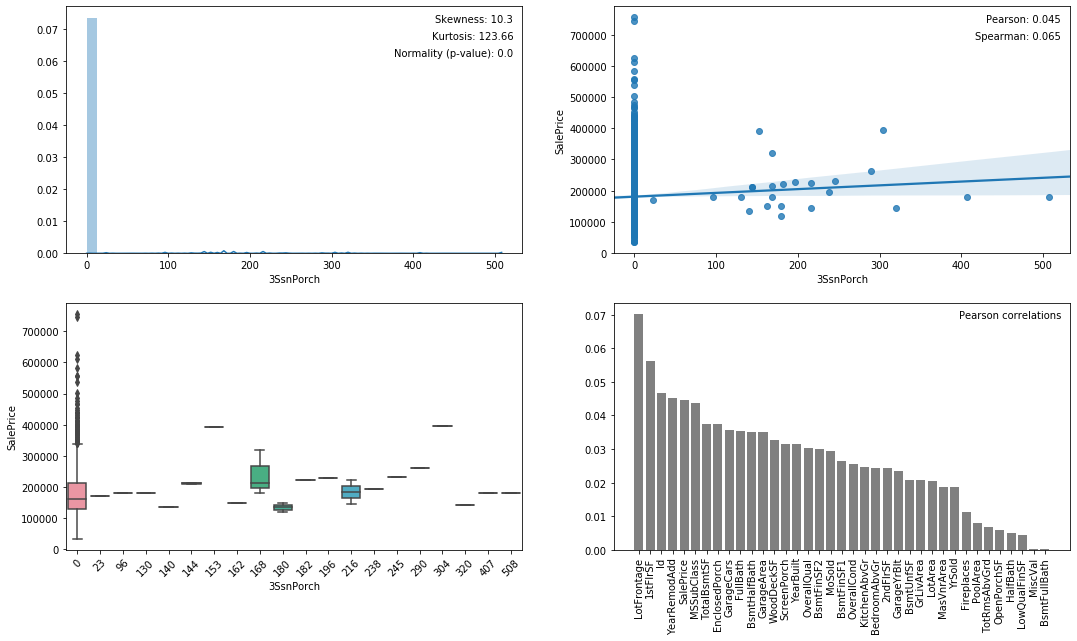

In [436]:
exploratory_analysis('3SsnPorch', 'SalePrice', df)

Should be deleted due to low number of non-zero values.

## ScreenPorch
Screen porch area in square feet

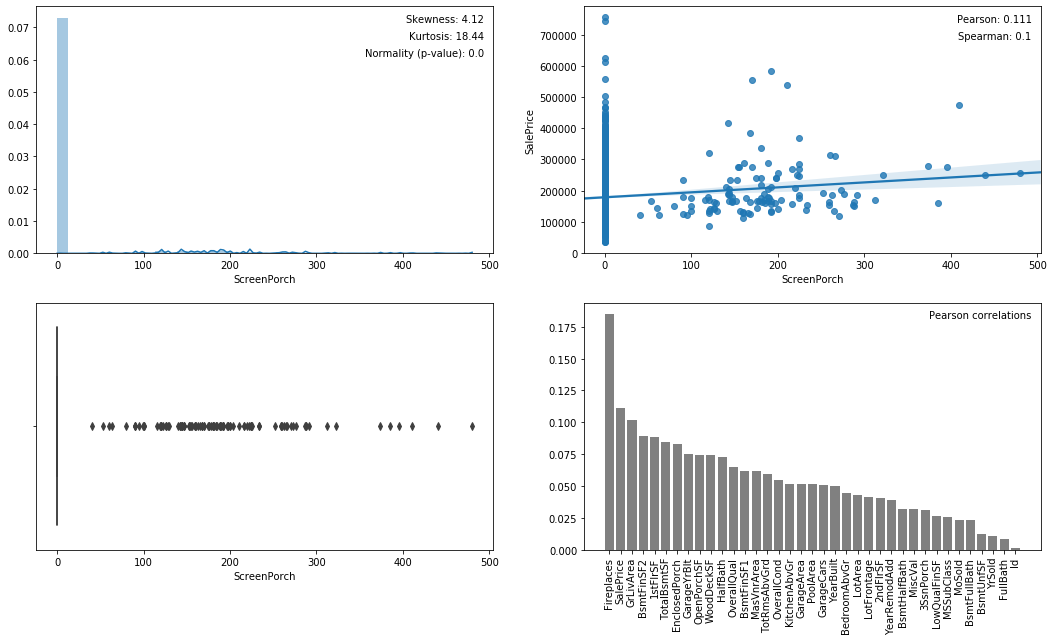

In [437]:
exploratory_analysis('ScreenPorch', 'SalePrice', df)

Use without any transformations.

## PoolArea
Pool area in square feet

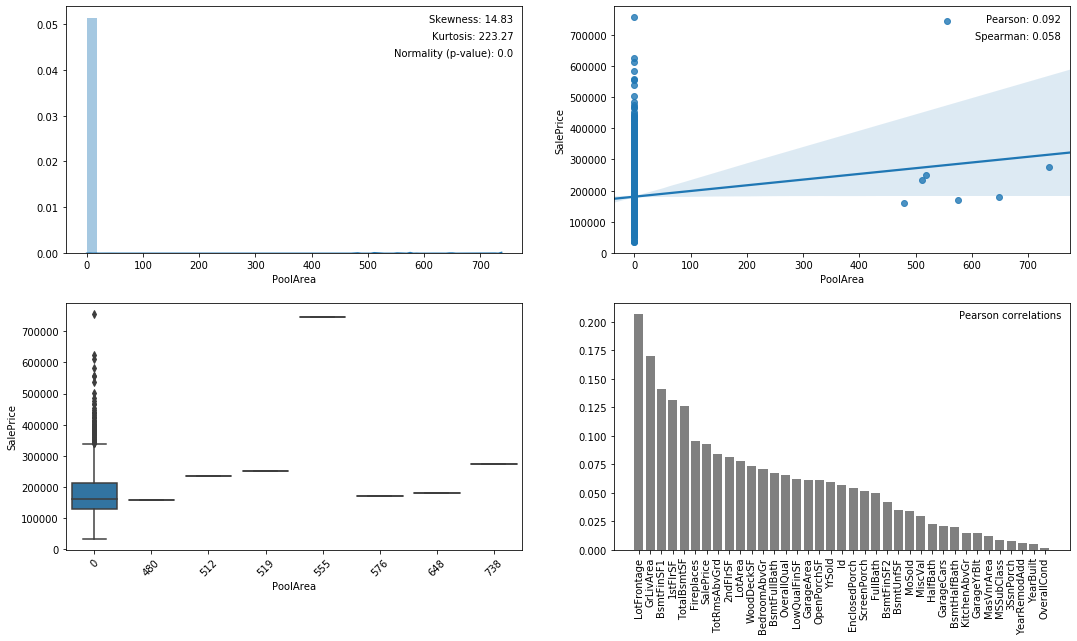

In [438]:
exploratory_analysis('PoolArea', 'SalePrice', df)

Should be deleted due to low number of non-zero values.

## MiscVal
Value of miscellaneous feature

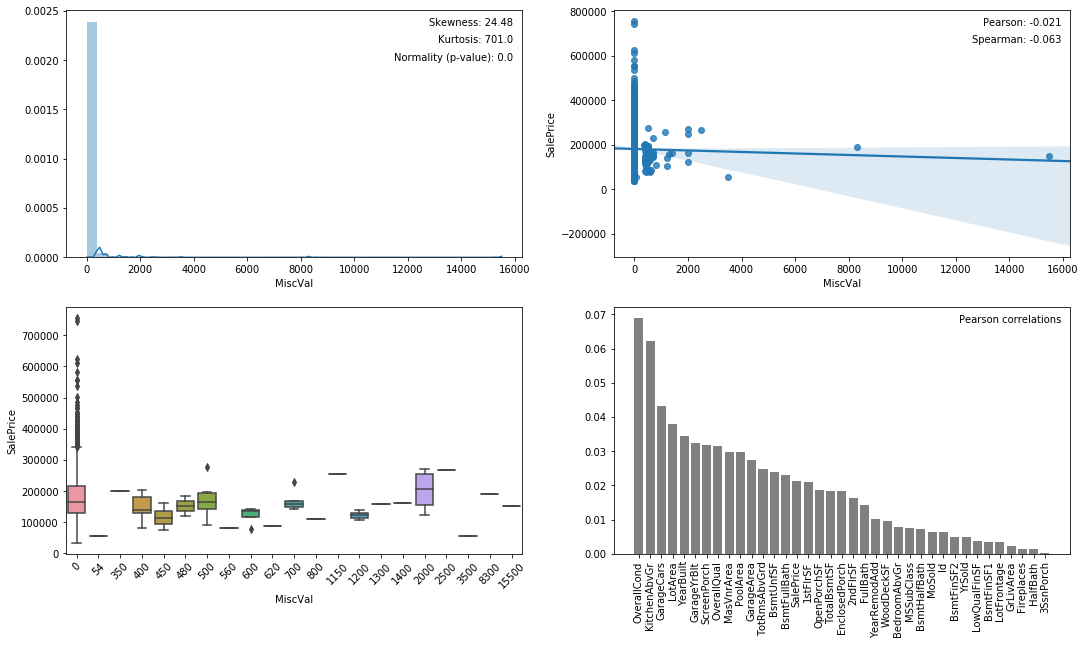

In [439]:
exploratory_analysis('MiscVal', 'SalePrice', df)

Use without any transformations.

## MoSold
Month Sold

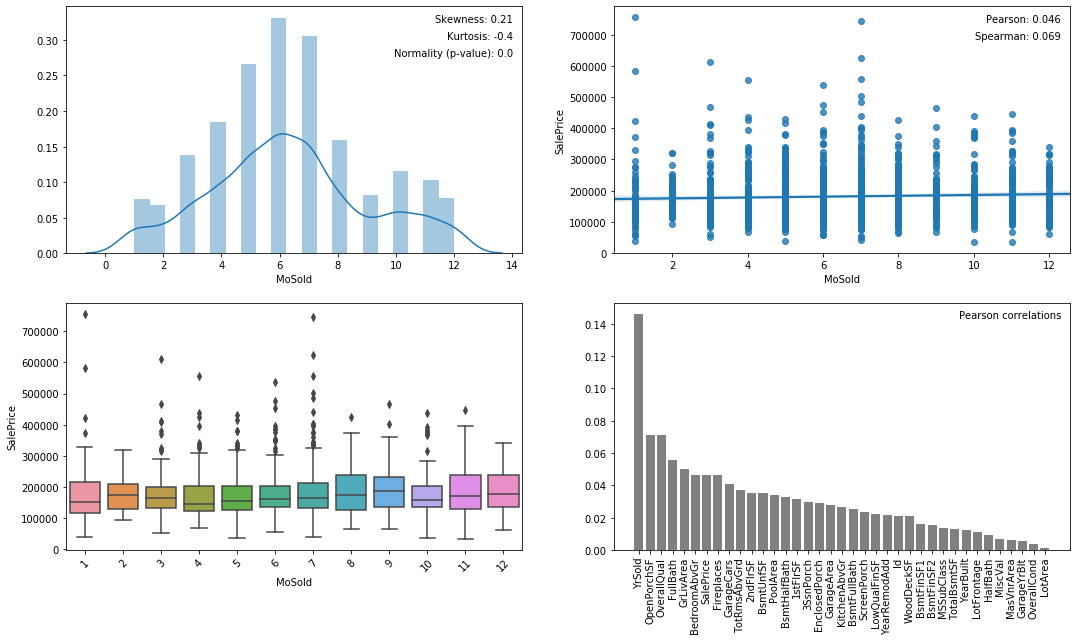

In [440]:
exploratory_analysis('MoSold', 'SalePrice', df)

Should be deleted as non informative.

## YrSold
Year Sold

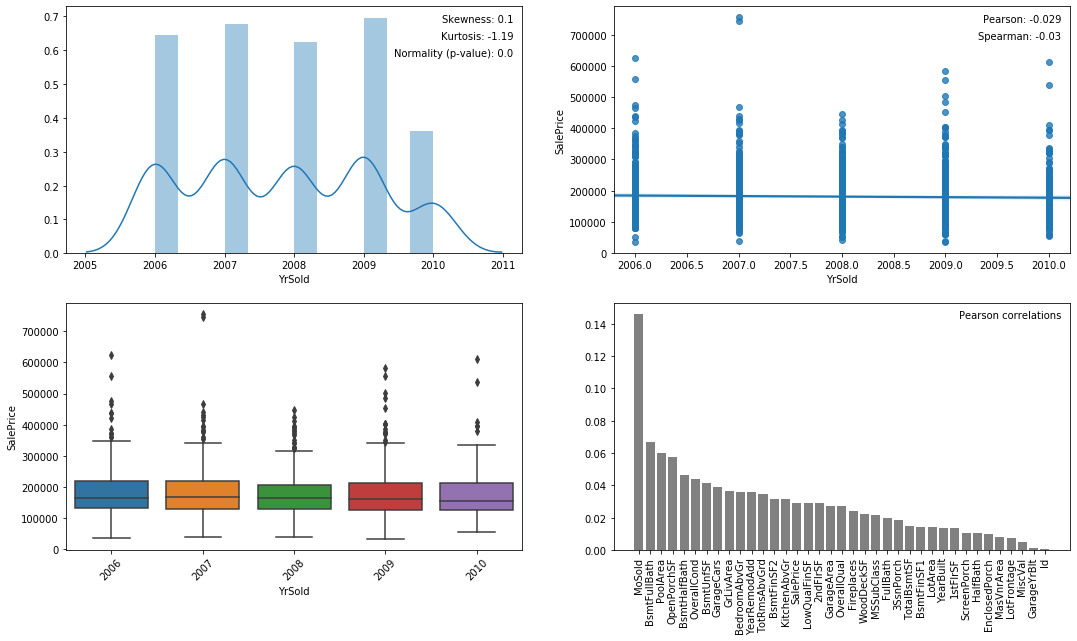

In [441]:
exploratory_analysis('YrSold', 'SalePrice', df)

Should be deleted as non informative.